# 泰坦尼克号数据分析

## 一：导入模块并读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 设置中文正常显示
plt.rcParams['font.sans-serif']=['SimHei']
# 设置符号正常显示
plt.rcParams['axes.unicode_minus']=False

In [2]:
data_train=pd.read_csv('data/train.csv')
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# PassengerId => 乘客ID
# Pclass => 乘客等级(1/2/3等舱位)
# Name => 乘客姓名
# Sex => 性别
# Age => 年龄
# SibSp => 堂兄弟/妹个数
# Parch => 父母与小孩个数
# Ticket => 船票信息
# Fare => 票价
# Cabin => 客舱
# Embarked => 登船港口

## 二：对数据做描述性统计分析

In [5]:
# 完整性分析
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


一共有891位乘客的信息，年龄只有714位乘客有值，客舱缺失值很多，只有204位乘客有值，登船港口有2个缺失

In [6]:
# 数值型数据描述性分析
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


有38.3%的人最后获救了，乘客平均年龄在29.7岁。票价均值在32

In [7]:
# 类别型数据描述性分析
data_train.select_dtypes('object').describe().T

,count,unique,top,freq
Name,891,891,"Adahl, Mr. Mauritz Nils Martin",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


男生偏多，登船港口有3种，S最多

### 1、获救情况人数可视化

In [8]:
data_Survived=data_train.Survived.value_counts()
data_Survived

0    549
1    342
Name: Survived, dtype: int64

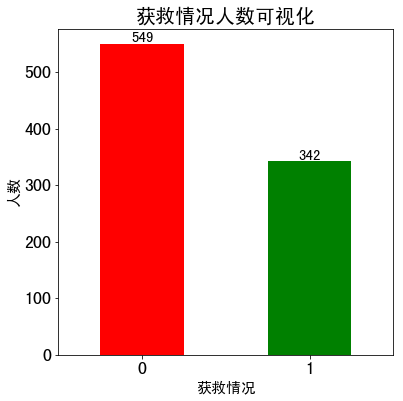

In [9]:
data_train.Survived.value_counts().plot(kind='bar',
                                       rot=0,
                                       figsize=(6,6),
                                       fontsize=18,
                                       color=['r','g'])
plt.title('获救情况人数可视化',fontsize=20)
plt.xlabel('获救情况',fontsize=15)
plt.ylabel('人数',fontsize=15)
for a,b in zip(data_Survived.index,data_Survived.values):
    plt.text(a,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

获救的人342名，没有获救的人数是549个

### 2、乘客等级人数可视化

In [10]:
data_Pclass=data_train.Pclass.value_counts()
data_Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

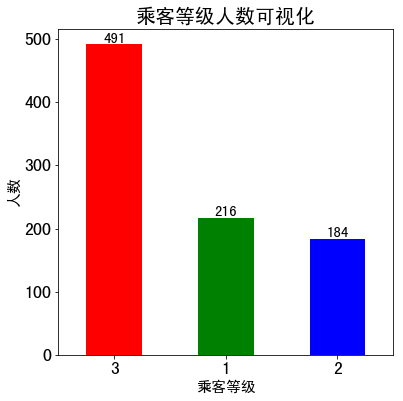

In [11]:
data_train.Pclass.value_counts().plot(kind='bar',
                                     rot=0,
                                     figsize=(6,6),
                                     fontsize=18,
                                     color=['r','g','b'])
plt.title('乘客等级人数可视化',fontsize=20)
plt.xlabel('乘客等级',fontsize=15)
plt.ylabel('人数',fontsize=15)
# 刻度的位置
plt.xticks([0,1,2])
for a,b in zip([0,1,2],data_Pclass.values):
    plt.text(a,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

结论：3等舱乘客非常多

### 3、各登船港口人数可视化

In [12]:
data_Embarked=data_train.Embarked.value_counts()
data_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

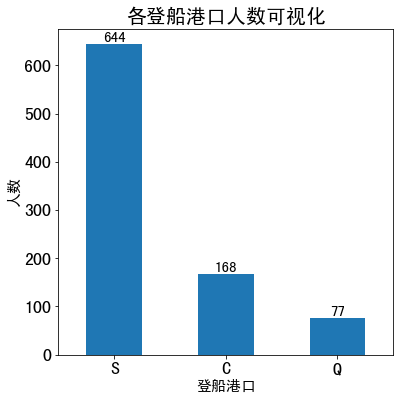

In [13]:
data_train.Embarked.value_counts().plot(kind='bar',
                                       rot=0,
                                       figsize=(6,6),
                                       fontsize=18)
plt.title('各登船港口人数可视化',fontsize=20)
plt.xlabel('登船港口',fontsize=15)
plt.ylabel('人数',fontsize=15)
plt.xticks([0,1,2])
for a,b in zip([0,1,2],data_Embarked.values):
    plt.text(a,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

结论：S港口的人数较多，远多于另外两个港口

### 4、各性别的可视化

In [14]:
data_Sex=data_train.Sex.value_counts()
data_Sex

male      577
female    314
Name: Sex, dtype: int64

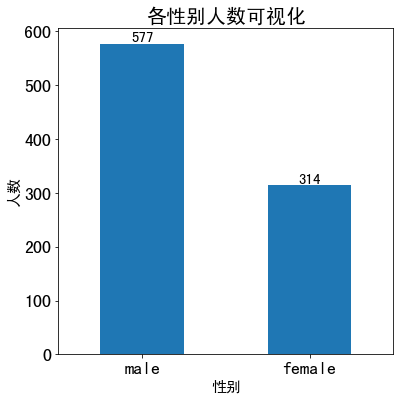

In [15]:
data_train.Sex.value_counts().plot(kind='bar',
                                  rot=0,
                                  figsize=(6,6),
                                  fontsize=18)
plt.title('各性别人数可视化',fontsize=20)
plt.xlabel('性别',fontsize=15)
plt.ylabel('人数',fontsize=15)
# plt.xticks([0,1])
for a,b in zip([0,1],data_Sex.values):
    plt.text(a,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

男生乘客非常多，人数是577人，女生是314人

## 三 : 对于数据做探索性分析

### 1、分析各个等级乘客年龄分布情况（特征和特征）

In [16]:
# data_train.Pclass==1

In [17]:
# data_train.Age[data_train.Pclass==1]

Text(0,0.5,'密度')

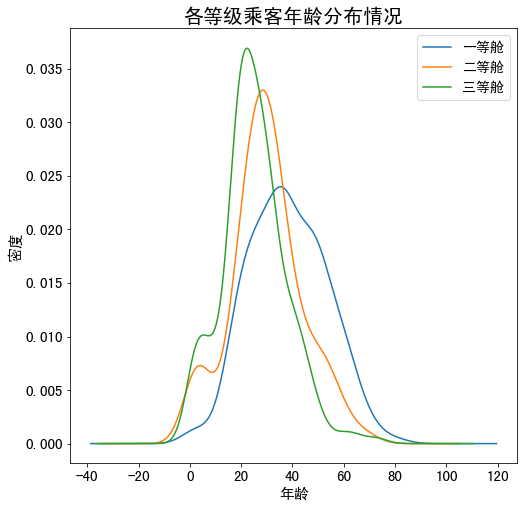

In [18]:
plt.figure(figsize=(8,8))
data_train.Age[data_train.Pclass==1].plot(kind='kde',fontsize=15)
data_train.Age[data_train.Pclass==2].plot(kind='kde',fontsize=15)
data_train.Age[data_train.Pclass==3].plot(kind='kde',fontsize=15)
plt.legend(['一等舱','二等舱','三等舱'],fontsize=14)
plt.title('各等级乘客年龄分布情况',fontsize=20)
plt.xlabel('年龄',fontsize=15)
plt.ylabel('密度',fontsize=15)

通过分析发现：三个不同的舱位年龄总体趋势一致，一等舱40岁左右的最多，二等舱30岁左右的最多，三等舱20岁左右的最多

### 2、查看各乘客等级的获救情况(特征和结果)

In [31]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data_train.Survived==0

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool

In [21]:
# data_train.Pclass[data_train.Survived==0]

In [33]:
# 未获救的情况统计
survied_0=data_train.Pclass[data_train.Survived==0].value_counts()
survied_0

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [34]:
# 获救的情况统计
survied_1=data_train.Pclass[data_train.Survived==1].value_counts()
survied_1

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [35]:
df_Pclass=pd.DataFrame({'获救':survied_1,'未获救':survied_0})
df_Pclass

,获救,未获救
1,136,80
2,87,97
3,119,372


乘客等级和最后是否获救有关系，一等舱获救概率最大

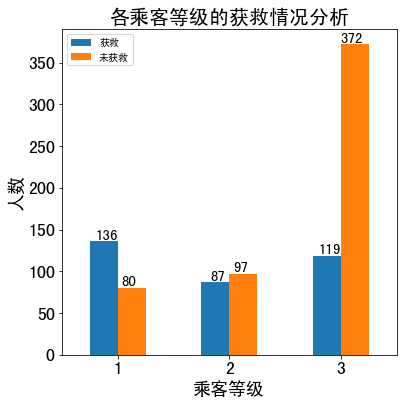

In [38]:
# 簇状柱形图
df_Pclass.plot(kind='bar',rot=0,figsize=(6,6),fontsize=18)
plt.xlabel('乘客等级',fontsize=18)
plt.ylabel('人数',fontsize=18)
plt.title('各乘客等级的获救情况分析',fontsize=20)
plt.xticks([0,1,2])
for a,b in zip([0,1,2],df_Pclass['未获救'].values):
    plt.text(a+0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)
for a,b in zip([0,1,2],df_Pclass['获救'].values):
    plt.text(a-0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)    

In [39]:
# 查看各乘客等级的获救概率
rate_Pcalss=df_Pclass['获救']/(df_Pclass['获救']+df_Pclass['未获救'])
rate_Pcalss=np.round(rate_Pcalss,2)
df_Pclass['rate_Pcalss']=rate_Pcalss
df_Pclass

,获救,未获救,rate_Pcalss
1,136,80,0.63
2,87,97,0.47
3,119,372,0.24


### 3、查看各性别的获救情况

In [40]:
# 未获救的数量
survied_Sex_0=data_train.Sex[data_train.Survived==0].value_counts()
survied_Sex_0

male      468
female     81
Name: Sex, dtype: int64

In [41]:
# 获救的数量
survied_Sex_1=data_train.Sex[data_train.Survived==1].value_counts()
survied_Sex_1

female    233
male      109
Name: Sex, dtype: int64

In [43]:
df_Sex=pd.DataFrame({'获救':survied_Sex_1
                     ,'未获救':survied_Sex_0})
df_Sex

,获救,未获救
female,233,81
male,109,468


性别和是否获救也是有关系的，女生的获救概率更大

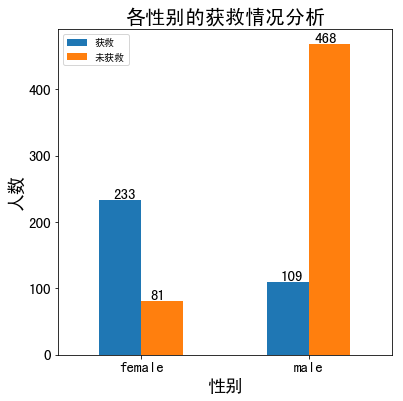

In [45]:
df_Sex.plot(kind='bar',rot=0,figsize=(6,6),fontsize=15)
plt.xlabel('性别',fontsize=18)
plt.ylabel('人数',fontsize=18)
plt.title('各性别的获救情况分析',fontsize=20)
for a,b in zip([0,1],df_Sex['未获救'].values):
    plt.text(a+0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)
for a,b in zip([0,1],df_Sex['获救'].values):
    plt.text(a-0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)    

In [46]:
Sex_Pcalss=df_Sex['获救']/(df_Sex['获救']+df_Sex['未获救'])
Sex_Pcalss=np.round(Sex_Pcalss,2)
df_Sex['Sex_Pcalss']=Sex_Pcalss
df_Sex

,获救,未获救,Sex_Pcalss
female,233,81,0.74
male,109,468,0.19


### 4、查看各登船港口的获救情况

In [47]:
# 未获救的数据
survied_Embarked_0=data_train.Embarked[data_train.Survived==0].value_counts()
# 获救的数据
survied_Embarked_1=data_train.Embarked[data_train.Survived==1].value_counts()
df_Embarked=pd.DataFrame({'获救':survied_Embarked_1,
                         '未获救':survied_Embarked_0})
df_Embarked

,获救,未获救
S,217,427
C,93,75
Q,30,47


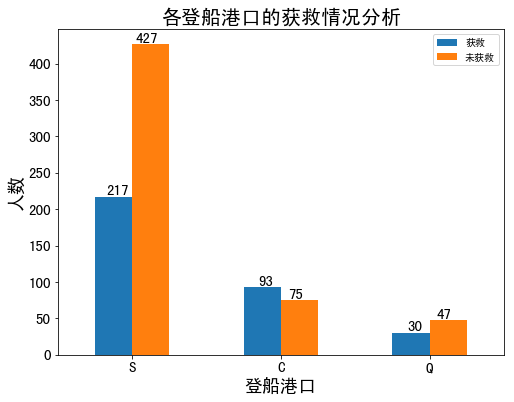

In [49]:
df_Embarked.plot(kind='bar',rot=0,fontsize=15,figsize=(8,6))
plt.xlabel('登船港口',fontsize=18)
plt.ylabel('人数',fontsize=18)
plt.title('各登船港口的获救情况分析',fontsize=20)
for a,b in zip([0,1,2],df_Embarked['未获救'].values):
    plt.text(a+0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)
for a,b in zip([0,1,2],df_Embarked['获救'].values):
    plt.text(a-0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)    

In [50]:
rate_Embarked=df_Embarked['获救']/(df_Embarked['获救']+df_Embarked['未获救'])
rate_Embarked=np.round(rate_Embarked,2)
df_Embarked['获救比例']=rate_Embarked
df_Embarked

,获救,未获救,获救比例
S,217,427,0.34
C,93,75,0.55
Q,30,47,0.39


#### 5、堂兄弟和父母字段对于获救情况分析

Text(0.5,1,'无父母小孩的存活率分析')

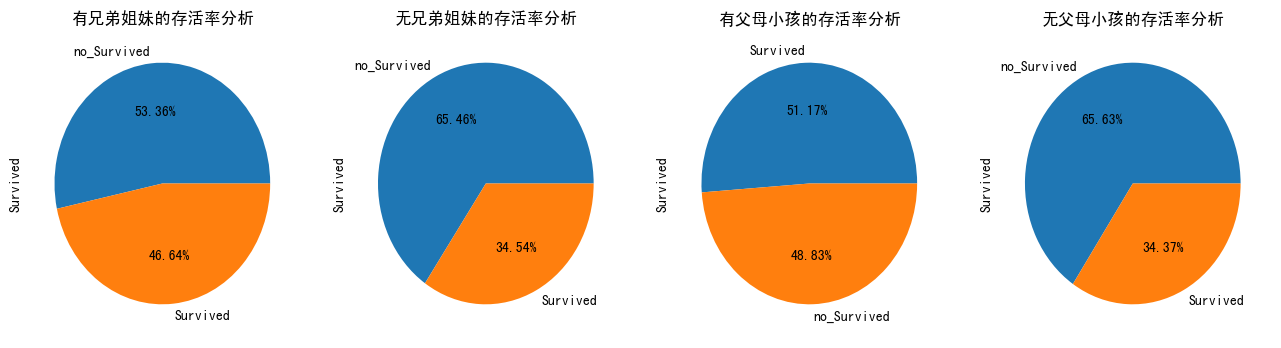

In [51]:
# 数据筛选
# 有兄弟姐妹的数据
sib_data=data_train[data_train['SibSp']!=0]
# sib_data
# 无兄弟姐妹的数据
nosib_data=data_train[data_train['SibSp']==0]
# 有父母小孩的数据
par_data=data_train[data_train['Parch']!=0]
# 无父母小孩的数据
nopar_data=data_train[data_train['Parch']==0]
# 创建一个画布
fig=plt.figure(figsize=(16,4),dpi=100)
# 有无兄弟姐妹的存活率对比
ax1=fig.add_subplot(1,4,1)
sib_data['Survived'].value_counts().plot(ax=ax1,kind='pie',labels=['no_Survived','Survived'],autopct='%.2f%%')
plt.title('有兄弟姐妹的存活率分析')

ax2=fig.add_subplot(1,4,2)
nosib_data['Survived'].value_counts().plot(ax=ax2,kind='pie',labels=['no_Survived','Survived'],autopct='%.2f%%')
plt.title('无兄弟姐妹的存活率分析')

# 有无父母小孩的存活率对比
ax3=fig.add_subplot(1,4,3)
par_data['Survived'].value_counts().plot(ax=ax3,kind='pie',labels=['Survived','no_Survived'],autopct='%.2f%%')
plt.title('有父母小孩的存活率分析')

ax4=fig.add_subplot(1,4,4)
nopar_data['Survived'].value_counts().plot(ax=ax4,kind='pie',labels=['no_Survived','Survived'],autopct='%.2f%%')
plt.title('无父母小孩的存活率分析')

#### 6、分析cabin这个值的有无，对于survival的分布状况

In [52]:
# 有cabin记录的的数据
survied_cabin=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
# 没有cabin记录的数据
# survied_cabin
survied_nocabin=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df_cabin=pd.DataFrame({'无':survied_nocabin,'有':survied_cabin}).T
df_cabin

,0,1
无,481,206
有,68,136


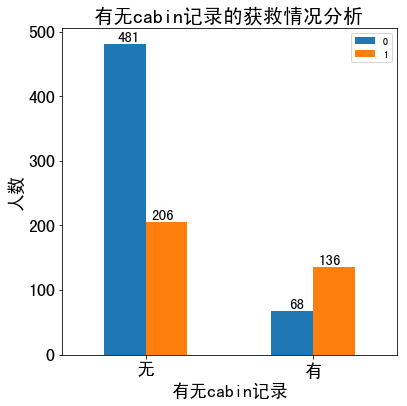

In [53]:
df_cabin.plot(kind='bar',rot=0,figsize=(6,6),fontsize=18)
plt.xlabel('有无cabin记录',fontsize=18)
plt.ylabel('人数',fontsize=18)
plt.title('有无cabin记录的获救情况分析',fontsize=20)
for a,b in zip([0,1],df_cabin[0].values):
    plt.text(a-0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)
for a,b in zip([0,1],df_cabin[1].values):
    plt.text(a+0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)  

In [54]:
rate_cabin=df_cabin[1]/(df_cabin[1]+df_cabin[0])
rate_cabin=np.round(rate_cabin,2)
df_cabin['rate_cabin']=rate_cabin
df_cabin

,0,1,rate_cabin
无,481,206,0.30
有,68,136,0.67


#### 7、分析获救的和没有获救的人票价分布情况

In [55]:
# 没有获救的人的票价数据
fare_die=data_train['Fare'][data_train['Survived']==0]
# 获救的人的票价数据
fare_sur=data_train['Fare'][data_train['Survived']==1]

In [56]:
fare_die.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [57]:
fare_sur.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64